<a href="https://colab.research.google.com/github/angelaaaateng/ML_COVID_PREDICTION/blob/master/Exploration_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Final Project: COVID Prediction in the Philippines 


#### Team members: 

#### Overview: 

##### [Preprocessing](#preprocessing_cell): 
- [openrefine clustering/data cleaning] (done outside this notebook, see scripts) 
- [Symptoms + Other Diseases Feature Engineering](#preprocessing_symp_cell)
- [Symptops + Other Diseases one hot encoding](#preprocessing_sympoh_cell)
- [Epi_Link Feature engineering](#preprocessing_epilink_cell)
- [Dates feature engineering](#preprocessing_dates_cell)
- [Geo-location feature engineering (absolute location)](#preprocessing_geo_cell)  
- [Location feature engineering (zip)](#preprocessing_zip_cell) 
- [Location feature engineering (city)](#preprocessing_city_cell)
- [Population Featue engineering](#preprocessing_pop_cell)
- [Final data cleaning (numeric encoding, etc)](#preprocessing_final_cell)

Naming Convention: 
- Amber: data = main dataframe

##### [Analysis & Modeling](#analysis&modeling_cell)
- [Clustering](#clustering_cell)
- [Modeling](#modeling_cell)

## Import Libraries + Load Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
# amber additions
!pwd

/Users/laurendarinzo/Desktop/ML_COVID_PREDICTION


<a id='preprocessing_cell'></a>
# Data Preprocessing

**DSP Data (Key = PHCaseNo)**

In [471]:
data = pd.read_csv('openrefine_PHCASES_COVID_04162020_PHnum.csv')
data.head()

,Case No.,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History 1,Travel History 2,Travel History 3,Travel History 4,...,Date of Final Status (recovered/expired),Final Diagnosis,Age Group,Location,Location 1,Location 2,Latitude,Longitude,Residence Lat,Residence Long
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,NaN,NaN,NaN,...,Sun Mar 15 00:00:00 EDT 2020,NaN,31 - 40,Manila City,Manila City,NaN,14.613480,120.980950,14.598727,120.9819909
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,NaN,NaN,NaN,...,Sat Feb 01 00:00:00 EST 2020,severe pneumonia,41 - 50,Manila City,Manila City,NaN,14.613480,120.980950,14.598727,120.9819909
2,PH00003,F,60,chinese,None,Yes (China),china,NaN,NaN,NaN,...,Sun Mar 15 00:00:00 EDT 2020,NaN,51 - 60,Manila City,Manila City,NaN,14.615867,120.980991,14.598727,120.9819909
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,NaN,NaN,NaN,...,Thu Mar 19 00:00:00 EDT 2020,"asymptomatic, negative test result",41 - 50,Taguig City,Taguig City,NaN,14.606904,121.020392,14.517274,121.0496133
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,NaN,NaN,NaN,...,Thu Mar 12 00:00:00 EDT 2020,"acute respiratory distress syndrome, severe pn...",61 - 70,"Cainta, Rizal",Cainta,Rizal,14.409635,121.037425,14.586506,121.1138255


In [472]:
data.columns

Index(['Case No.', 'Sex', 'Age', 'Nationality', 'Residence in the Philippines',
       'History of Travel / Exposure', 'Travel History 1', 'Travel History 2',
       'Travel History 3', 'Travel History 4', 'Epi_Link',
       'Date of Onset of Symptoms', 'Date of Admission',
       'Date of Lab Confirmation', 'Date of Announcement to the Public',
       'Admission / Consultation', 'Symptoms', 'Other disease', 'Status',
       'Health Status', 'Date of Final Status (recovered/expired)',
       'Final Diagnosis', 'Age Group', 'Location', 'Location 1', 'Location 2',
       'Latitude', 'Longitude', 'Residence Lat', 'Residence Long'],
      dtype='object')

In [473]:
data = data.rename(columns={'Case No.': 'phcaseno', 'Travel History 1': 'Travel History'})

In [474]:
# data.dtypes

In [475]:
data.shape

(3246, 30)

In [476]:
# target variable information (before clustering)
data.groupby('Health Status').size()

Health Status
asymptomatic        38
critical             3
died               108
for validation    2983
mild                57
recovered           51
severe               6
dtype: int64

In [477]:
data['Other disease']=data['Other disease'].str.replace('  ',' ')
data['Other disease']=data['Other disease'].str.replace(', ',',')
data['Other disease']=data['Other disease'].str.replace(' ,',',')
data['Other disease']=data['Other disease'].str.replace('diabetes','diabetes')
data['Other disease']=data['Other disease'].str.replace('renal disease','renal disease')
data['Other disease']=data['Other disease'].str.replace('acute kidney injury','acute kidney injury')
data['Other disease']=data['Other disease'].str.replace('asthma','asthma')
data['Other disease']=data['Other disease'].str.replace('atherosclerosis','atherosclerosis')
data['Other disease']=data['Other disease'].str.replace('atherosclerotic cardiovascular disease','atherosclerosis')
data['Other disease']=data['Other disease'].str.replace('benign prostatic hyperplasia','benign prostatic hyperplasia')
data['Other disease']=data['Other disease'].str.replace('benign prostatic hypertrophy','benign prostatic hyperplasia')
data['Other disease']=data['Other disease'].str.replace('bronchial asthma','asthma')
data['Other disease']=data['Other disease'].str.replace('cardiac disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('cardiac dysrhythmia','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('cardiomyopathy','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('cardiovascular disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('cerebrovascular accident infarc','cerebrovascular disease infarction')
data['Other disease']=data['Other disease'].str.replace('cerebrovascular disease infarction','cerebrovascular disease infarction')
data['Other disease']=data['Other disease'].str.replace('chronic kidney disease','renal disease')
data['Other disease']=data['Other disease'].str.replace('chronic obstructive pulmonary disease','chronic obstructive pulmonary disease')
data['Other disease']=data['Other disease'].str.replace('colon cancer','colon cancer')
data['Other disease']=data['Other disease'].str.replace('coronary artery disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('coronary heart disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('dengue','dengue')
data['Other disease']=data['Other disease'].str.replace('diabetes mellitus','diabetes')
data['Other disease']=data['Other disease'].str.replace('diabetes','diabetes')
data['Other disease']=data['Other disease'].str.replace('diabetic ketoacidosis','diabetes')
data['Other disease']=data['Other disease'].str.replace('diabetic nephropathy','diabetes')
data['Other disease']=data['Other disease'].str.replace('diabetis mellitus','diabetes')
data['Other disease']=data['Other disease'].str.replace('dyslipidemia','dyslipidemia')
data['Other disease']=data['Other disease'].str.replace('endocrine condition','endocrine condition')
data['Other disease']=data['Other disease'].str.replace('hypertension','hypertension')
data['Other disease']=data['Other disease'].str.replace('hypertensioncardiovascular disease','hypertension,cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('hypertensive cardiovascular disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('hypertensive nephrosclerosis','renal disease')
data['Other disease']=data['Other disease'].str.replace('hyperthyroidism','hyperthyroidism')
data['Other disease']=data['Other disease'].str.replace('hypothyroidism','hypothyroidism')
data['Other disease']=data['Other disease'].str.replace('impaired fasting glucose','impaired fasting glucose')
data['Other disease']=data['Other disease'].str.replace('ischemic heart disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('kidney disease secondary tohypertension nephrosclerosis','renal disease')
data['Other disease']=data['Other disease'].str.replace('kidney disease','renal disease')
data['Other disease']=data['Other disease'].str.replace('peripheral arterial occlusive disease','peripheral arterial occlusive disease')
data['Other disease']=data['Other disease'].str.replace('renal disease','renal disease')
data['Other disease']=data['Other disease'].str.replace('tongue cancer','tongue cancer')
data['Other disease']=data['Other disease'].str.replace('valvular heart disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('acute kidney injury secondary to pre-renal azotemia','acute renal failure')
data['Other disease']=data['Other disease'].str.replace('acute kidney injury','acute kidney injury')
data['Other disease']=data['Other disease'].str.replace('acute renal failure','acute renal failure')
data['Other disease']=data['Other disease'].str.replace('acute renal failure,cardiovascular disease,cardiovascular disease,diabetes mellitus','acute renal failure,cardiovascular disease,cardiovascular disease,diabetes')
data['Other disease']=data['Other disease'].str.replace('asthma','asthma')
data['Other disease']=data['Other disease'].str.replace('asymptomatic','asymptomatic')
data['Other disease']=data['Other disease'].str.replace('breast cancer','breast cancer')
data['Other disease']=data['Other disease'].str.replace('bronchial asthma','asthma')
data['Other disease']=data['Other disease'].str.replace('bronchialasthma','asthma')
data['Other disease']=data['Other disease'].str.replace('cardiac disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('chronic kidney disease secondary to hypertension nephrosclerosis','renal disease')
data['Other disease']=data['Other disease'].str.replace('chronic kidney disease','renal disease')
data['Other disease']=data['Other disease'].str.replace('chronic obstructive pulmonary disease','chronic obstructive pulmonary disease')
data['Other disease']=data['Other disease'].str.replace('community-acquired pneumonia','community-acquired pneumonia')
data['Other disease']=data['Other disease'].str.replace('diabetes','diabetes')
data['Other disease']=data['Other disease'].str.replace('diabetes,hypertensioncardiovascular disease,renal disease,diabetes','diabetes,hypertension,cardiovascular disease,renal disease,diabetes')
data['Other disease']=data['Other disease'].str.replace('diabetis mellitus','diabetes')
data['Other disease']=data['Other disease'].str.replace('dis_renal disease secondary tohypertension nephrosclerosis','renal disease')
data['Other disease']=data['Other disease'].str.replace('hypertension','hypertension')
data['Other disease']=data['Other disease'].str.replace('hypertensive cardiovascular disease','cardiovascular disease')
data['Other disease']=data['Other disease'].str.replace('hypertensive','hypertension')
data['Other disease']=data['Other disease'].str.replace('hyperthyroidism','hyperthyroidism')
data['Other disease']=data['Other disease'].str.replace('kidney disease secondary tohypertension nephrosclerosis','renal disease')
data['Other disease']=data['Other disease'].str.replace('myocarditis,diabetes,acute kidney injury,hypertension','cardiovascular disease,diabetes,acute kidney injury,hypertension')
data['Other disease']=data['Other disease'].str.replace('none','asymptomatic')
data['Other disease']=data['Other disease'].str.replace('none','none')
data['Other disease']=data['Other disease'].str.replace('permanent atrial fibrillation','permanent atrial fibrillation')
data['Other disease']=data['Other disease'].str.replace('prostatic cancer','prostatic cancer')
data['Other disease']=data['Other disease'].str.replace('remnal disease','renal disease')
data['Other disease']=data['Other disease'].str.replace('renal disease secondary tohypertension nephrosclerosis','renal disease')
data['Other disease']=data['Other disease'].str.replace('renal disease','renal disease')
data['Other disease']=data['Other disease'].str.replace('status post renal transplant','status post renal transplant')
data['Other disease']=data['Other disease'].str.replace('systemic lupus erythematosus','systemic lupus erythematosus')
data['Other disease']=data['Other disease'].str.replace('renal disease secondary to hypertension nephrosclerosis','renal disease,hypertension')
data['Other disease']=data['Other disease'].str.replace('with comorbid (not specified)','comorbid_unknown',regex=False)
data['Other disease']=data['Other disease'].str.replace('hypertensioncardiovascular disease','cardiovascular disease',regex=False)
data['Other disease']=data['Other disease'].str.replace('chronicrenal disease','renal disease',regex=False)
data['Symptoms']=data['Symptoms'].str.replace(' ,',',')
data['Symptoms']=data['Symptoms'].str.replace(', ',',')
data['Symptoms']=data['Symptoms'].str.replace('  ',' ')
data['Symptoms']=data['Symptoms'].str.replace('body malaise','body malaise')
data['Symptoms']=data['Symptoms'].str.replace('colds','colds')
data['Symptoms']=data['Symptoms'].str.replace('comorbidity','comorbidity')
data['Symptoms']=data['Symptoms'].str.replace('cough','cough')
data['Symptoms']=data['Symptoms'].str.replace('difficulty in breathing','dyspnea')
data['Symptoms']=data['Symptoms'].str.replace('dizziness','dizziness')
data['Symptoms']=data['Symptoms'].str.replace('dysphagia','dysphagia')
data['Symptoms']=data['Symptoms'].str.replace('headache','headache')
data['Symptoms']=data['Symptoms'].str.replace('shortness of breath','dyspnea')
data['Symptoms']=data['Symptoms'].str.replace('sore throat','sore throat')
data['Symptoms']=data['Symptoms'].str.replace('difficulty of breathing','dyspnea')


In [478]:
data.dtypes

phcaseno                                     object
Sex                                          object
Age                                           int64
Nationality                                  object
Residence in the Philippines                 object
History of Travel / Exposure                 object
Travel History                               object
Travel History 2                             object
Travel History 3                             object
Travel History 4                             object
Epi_Link                                     object
Date of Onset of Symptoms                    object
Date of Admission                            object
Date of Lab Confirmation                     object
Date of Announcement to the Public           object
Admission / Consultation                     object
Symptoms                                     object
Other disease                                object
Status                                       object
Health Statu

In [479]:
data.groupby('Other disease').size()

Other disease
acute kidney injury                                                                               2
acute kidney injury,benign prostatic hyperplasia                                                  1
acute kidney injury,hypertension,diabetes                                                         1
acute renal failure                                                                               1
acute renal failure,cardiovascular disease,cardiovascular disease,diabetes                        1
asthma                                                                                            3
asthma,diabetes                                                                                   1
asthma,hypertension,atherosclerosis,cardiovascular disease                                        1
asymptomatic                                                                                      8
breast cancer,diabetes                                                                

<a id='preprocessing_symp_cell'></a>
## Feature Engineering: Symptoms + Other Diseases

<a id='preprocessing_sympoh_cell'></a>
## One Hot Encoding: Symptoms + Other Diseases 

In [480]:
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Travel History 2,Travel History 3,Travel History 4,...,Date of Final Status (recovered/expired),Final Diagnosis,Age Group,Location,Location 1,Location 2,Latitude,Longitude,Residence Lat,Residence Long
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,NaN,NaN,NaN,...,Sun Mar 15 00:00:00 EDT 2020,NaN,31 - 40,Manila City,Manila City,NaN,14.613480,120.980950,14.598727,120.9819909
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,NaN,NaN,NaN,...,Sat Feb 01 00:00:00 EST 2020,severe pneumonia,41 - 50,Manila City,Manila City,NaN,14.613480,120.980950,14.598727,120.9819909
2,PH00003,F,60,chinese,None,Yes (China),china,NaN,NaN,NaN,...,Sun Mar 15 00:00:00 EDT 2020,NaN,51 - 60,Manila City,Manila City,NaN,14.615867,120.980991,14.598727,120.9819909
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,NaN,NaN,NaN,...,Thu Mar 19 00:00:00 EDT 2020,"asymptomatic, negative test result",41 - 50,Taguig City,Taguig City,NaN,14.606904,121.020392,14.517274,121.0496133
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,NaN,NaN,NaN,...,Thu Mar 12 00:00:00 EDT 2020,"acute respiratory distress syndrome, severe pn...",61 - 70,"Cainta, Rizal",Cainta,Rizal,14.409635,121.037425,14.586506,121.1138255


In [481]:
# drop empty columns
data = data.drop([    
 'Travel History 2',
 'Travel History 3',
 'Travel History 4'], axis = 1)

In [482]:
symptoms = data.set_index('phcaseno').Symptoms.str.split(',', expand=True).stack()

In [483]:
# symptoms 

In [484]:
symptoms= pd.get_dummies(symptoms, prefix='symp').groupby(level=0).sum()
# symptoms

In [485]:
# join it back to the original 
data = data.merge(symptoms, on=['phcaseno'], how='left', indicator=True)

In [486]:
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Epi_Link,Date of Onset of Symptoms,Date of Admission,...,symp_colds,symp_comorbidity,symp_cough,symp_dizziness,symp_dysphagia,symp_dyspnea,symp_fever,symp_headache,symp_sore throat,_merge
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,Wife of PH2,Tue Jan 21 00:00:00 EST 2020,Sat Jan 25 00:00:00 EST 2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,Husband of PH1,Sat Jan 18 00:00:00 EST 2020,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,both
2,PH00003,F,60,chinese,None,Yes (China),china,Traveled to Cebu and Bohol. Was already in Chi...,Tue Jan 21 00:00:00 EST 2020,Wed Jan 22 00:00:00 EST 2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,NaN,Tue Mar 03 00:00:00 EST 2020,Fri Mar 06 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,both
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,Husband of PH6,Tue Feb 25 00:00:00 EST 2020,Thu Mar 05 00:00:00 EST 2020,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,both


In [487]:
#symptoms
#symptoms.to_csv(r'C:\Users\User\Downloads\df_symptoms.csv')

In [488]:
cols = ['symp_asymptomatic',
'symp_body malaise',
'symp_colds',
'symp_comorbidity',
'symp_cough',
'symp_dizziness',
'symp_dysphagia',
'symp_dyspnea',
'symp_fever',
'symp_headache',
'symp_sore throat'
]

In [489]:
data[cols] = data[cols].replace({np.nan:0.0})
data[cols] = data[cols].replace({2:1})

**Table with One Hot Encoded Symptoms** 

In [490]:
data = data.drop(['_merge'], axis =1)

In [491]:
data['Other disease'].values.tolist()
data = data.rename(columns={'Other disease':'other_disease'}, errors="raise")

In [492]:
disease = data.set_index('phcaseno').other_disease.str.split(',', expand=True).stack()
# disease

In [493]:
disease_all= pd.get_dummies(disease, prefix='dis').groupby(level=0).sum()
# disease_all

In [494]:
data = data.merge(disease_all, on=['phcaseno'], how='left', indicator=True)

In [495]:
#disease_all.to_csv(r'C:\Users\User\Downloads\df_disease.csv')

In [496]:
cols = ['dis_acute kidney injury',
'dis_acute renal failure',
'dis_asthma',
'dis_asymptomatic',
'dis_atherosclerosis',
'dis_benign prostatic hyperplasia',
'dis_breast cancer',
'dis_cardiovascular disease',
'dis_cerebrovascular disease infarction',
'dis_chronic obstructive pulmonary disease',
'dis_colon cancer',
'dis_community-acquired pneumonia',
'dis_dengue',
'dis_diabetes',
'dis_dyslipidemia',
'dis_endocrine condition',
'dis_hypertension',
'dis_hyperthyroidism',
'dis_hypothyroidism',
'dis_impaired fasting glucose',
'dis_peripheral arterial occlusive disease',
'dis_permanent atrial fibrillation',
'dis_prostatic cancer',
'dis_renal disease',
'dis_status post renal transplant',
'dis_systemic lupus erythematosus',
'dis_tongue cancer',
'dis_comorbid_unknown'
]

In [497]:
data[cols] = data[cols].replace({np.nan:0.0})
data[cols] = data[cols].replace({2:1})

In [498]:
data

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Epi_Link,Date of Onset of Symptoms,Date of Admission,...,dis_hypothyroidism,dis_impaired fasting glucose,dis_peripheral arterial occlusive disease,dis_permanent atrial fibrillation,dis_prostatic cancer,dis_renal disease,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_tongue cancer,_merge
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,Wife of PH2,Tue Jan 21 00:00:00 EST 2020,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,Husband of PH1,Sat Jan 18 00:00:00 EST 2020,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
2,PH00003,F,60,chinese,None,Yes (China),china,Traveled to Cebu and Bohol. Was already in Chi...,Tue Jan 21 00:00:00 EST 2020,Wed Jan 22 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,NaN,Tue Mar 03 00:00:00 EST 2020,Fri Mar 06 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,Husband of PH6,Tue Feb 25 00:00:00 EST 2020,Thu Mar 05 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,PH03242,F,65,filipino,For validation,0,for validation,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
3242,PH03243,F,24,filipino,For validation,0,for validation,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
3243,PH03244,M,48,filipino,For validation,0,for validation,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
3244,PH03245,M,67,filipino,For validation,0,for validation,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only


**The `symptoms` and `other_disease` columns have no been feature engineered.**

In [499]:
data = data.drop(['_merge'], axis = 1) 
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Epi_Link,Date of Onset of Symptoms,Date of Admission,...,dis_hyperthyroidism,dis_hypothyroidism,dis_impaired fasting glucose,dis_peripheral arterial occlusive disease,dis_permanent atrial fibrillation,dis_prostatic cancer,dis_renal disease,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_tongue cancer
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,Wife of PH2,Tue Jan 21 00:00:00 EST 2020,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,Husband of PH1,Sat Jan 18 00:00:00 EST 2020,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PH00003,F,60,chinese,None,Yes (China),china,Traveled to Cebu and Bohol. Was already in Chi...,Tue Jan 21 00:00:00 EST 2020,Wed Jan 22 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,NaN,Tue Mar 03 00:00:00 EST 2020,Fri Mar 06 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,Husband of PH6,Tue Feb 25 00:00:00 EST 2020,Thu Mar 05 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [501]:
data.shape

(3246, 66)

In [502]:
#data.to_csv(r'C:\Users\User\Downloads\data.csv')

<a id='preprocessing_epilink_cell'></a>
## Feature Engineering: EpiLink

In [40]:
#PREP
#make everything lowercase so words like Travel and travel are equivalent
data['Epi_Link']=data['Epi_Link'].str.lower()

#make NaNs strings since we are using boolean string comparison and I was getting weird errors
data['Epi_Link']=data['Epi_Link'].fillna("NaN") 

Exposure count
- Approach: For instances that aren't about travel or aren't really long (less than 50 characters), split on the comma, colon, or and and count

In [41]:
#epi link exposure
data['Epi_Link_Exposure']=0
for i in range(len(data)):
    if len(data['Epi_Link'][i]) < 50:
        data['Epi_Link'][i]=re.split('; |, | and', data['Epi_Link'][i])                                    
        data['Epi_Link_Exposure'][i] = len(data['Epi_Link'][i])
                                           
    #for now ignore instances that are about travel
    if'travel' in data['Epi_Link'][i]:
        data['Epi_Link_Exposure'][i] = 0 

<a id='preprocessing_dates_cell'></a>
## Feature Engineering: Dates

In [42]:
# data.columns.tolist()

In [43]:
data['Date of Onset of Symptoms'] = pd.to_datetime(data['Date of Onset of Symptoms'])
data['Date of Announcement to the Public'] = pd.to_datetime(data['Date of Announcement to the Public'])
data['Date of Final Status (recovered/expired)'] = pd.to_datetime(data['Date of Final Status (recovered/expired)'])

In [44]:
# add new column
data['disease_len_days'] = data['Date of Final Status (recovered/expired)'] - data['Date of Onset of Symptoms']

<a id='preprocessing_geo_cell'></a>
## Feature Engineering: Geo-location (absolute location)

In [45]:
# note: RUN THIS LAST, it takes forever to run

In [50]:
# %load_ext au totime
import pandas as pd

import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import matplotlib.pyplot as plt
import plotly_express as px
import tqdm
from tqdm import tqdm
from tqdm._tqdm_notebook import tqdm_notebook
import time

import plotly_express as px

In [51]:
geolocator = Nominatim()
# geolocator = Nominatim(domain='localhost:8888/nominatim', scheme='http')
# geolocator=Nominatim(domain='localhost:8080', scheme='http')

In [52]:
def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]), timeout = 100)
    time.sleep(1.5)
    print("Currently at index", df['phcaseno'], "/", len(df))
    return location.raw['address']

In [53]:
geolocator = geopy.Nominatim(user_agent='my-application')

In [1]:
# geo_address = data.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Latitude', lon_field='Longitude')

In [55]:
geo_address

0       {'hospital': 'San Lazaro Hospital', 'road': 'Q...
1       {'hospital': 'San Lazaro Hospital', 'road': 'Q...
2       {'public_building': 'Francisco Duque Hall', 'r...
3       {'hospital': 'University of the East - Ramon M...
4       {'hospital': 'Research Institute for Tropical ...
                              ...                        
3241    {'public_building': 'Francisco Duque Hall', 'r...
3242    {'public_building': 'Francisco Duque Hall', 'r...
3243    {'public_building': 'Francisco Duque Hall', 'r...
3244    {'public_building': 'Francisco Duque Hall', 'r...
3245    {'public_building': 'Francisco Duque Hall', 'r...
Length: 3246, dtype: object

In [56]:
len(data)

3246

In [58]:
data['geo_address'] = geo_address

In [88]:
temp_data = pd.read_csv('data_clean_w_addresses.csv')

In [90]:
# pulling address string from temp_data dataframe

data['address'] = temp_data['address']

In [91]:
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Epi_Link,Date of Onset of Symptoms,Date of Admission,...,dis_prostatic cancer,dis_remnal disease,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_with comorbid (not specified),Epi_Link_Exposure,disease_len_days,geo_address,Travel History Binary,address
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,[wife of ph2],2020-01-21 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,53 days 23:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...",1,"San Lazaro Hospital, Quiricada Street, Baranga..."
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,[husband of ph1],2020-01-18 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,14 days 00:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...",1,"San Lazaro Hospital, Quiricada Street, Baranga..."
2,PH00003,F,60,chinese,None,Yes (China),china,traveled to cebu and bohol. was already in chi...,2020-01-21 00:00:00-05:00,Wed Jan 22 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0,53 days 23:00:00,"{'public_building': 'Francisco Duque Hall', 'r...",1,"Francisco Duque Hall, Tayuman Street, Santa Cr..."
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,[NaN],2020-03-03 00:00:00-05:00,Fri Mar 06 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,15 days 23:00:00,{'hospital': 'University of the East - Ramon M...,1,University of the East - Ramon Magsaysay Memor...
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,[husband of ph6],2020-02-25 00:00:00-05:00,Thu Mar 05 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,15 days 23:00:00,{'hospital': 'Research Institute for Tropical ...,0,"Research Institute for Tropical Medicine, Corp..."


## Feature Engineering: Travel History

In [94]:
# function to convert Travel History to 3 classes
# -1 : No data for Travel History
# 0 : Did not travel outside of the Philippines
# 1 : Traveled abroad

def convert_travel_hist(series):
    if series.lower() == 'for validation':
        return -1
    elif series.lower() == 'none'or series.lower() == 'went to Greenhills':
        return 0
    else:
        return 1

In [95]:
data['Travel History Binary'] = data['Travel History'].apply(convert_travel_hist)

In [96]:
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Epi_Link,Date of Onset of Symptoms,Date of Admission,...,dis_prostatic cancer,dis_remnal disease,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_with comorbid (not specified),Epi_Link_Exposure,disease_len_days,geo_address,address,Travel History Binary
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,[wife of ph2],2020-01-21 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,53 days 23:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,[husband of ph1],2020-01-18 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,14 days 00:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1
2,PH00003,F,60,chinese,None,Yes (China),china,traveled to cebu and bohol. was already in chi...,2020-01-21 00:00:00-05:00,Wed Jan 22 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,0,53 days 23:00:00,"{'public_building': 'Francisco Duque Hall', 'r...","Francisco Duque Hall, Tayuman Street, Santa Cr...",1
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,[NaN],2020-03-03 00:00:00-05:00,Fri Mar 06 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,15 days 23:00:00,{'hospital': 'University of the East - Ramon M...,University of the East - Ramon Magsaysay Memor...,1
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,[husband of ph6],2020-02-25 00:00:00-05:00,Thu Mar 05 00:00:00 EST 2020,...,0.0,0.0,0.0,0.0,0.0,1,15 days 23:00:00,{'hospital': 'Research Institute for Tropical ...,"Research Institute for Tropical Medicine, Corp...",0


## Feature Engineering: Population Income
Note: Average Income based on the region each patient lives in

In [122]:
def extract_region(series):
    if type(series) != str:
        return 
        
    if 'NCR' in series:
        return 'NCR'
    elif 'Cordillera Administrative Region' in series:
        return 'CAR'
    elif 'Ilocos' in series:
        return 'Ilocos'
    elif 'Cagayan Valley' in series:
        return 'Cagayan Valley'
    elif 'Central Luzon' in series:
        return 'Central Luzon'
    elif 'Calabarzon' in series:
        return 'Calabarzon'
    elif 'Bicol' in series:
        return 'Bicol'
    elif 'Western Visayas' in series:
        return 'Western Visayas'
    elif 'Central Visayas' in series:
        return 'Central Visayas'
    elif 'Eastern Visayas' in series:
        return 'Eastern Visayas'
    elif 'Zamboanga Peninsula' in series:
        return 'Zamboanga Peninsula'
    elif 'Northern Mindanao' in series:
        return 'Northern Mindanao'
    elif 'Davao' in series:
        return 'Davao'
    elif 'Soccsksargen' in series:
        return 'Soccsksargen'
    elif 'Caraga' in series:
        return 'Caraga'
    else:
        return 'Bangsamoro Autonomous Region in Muslim Mindanao'

In [104]:
data['address'][0]

'San Lazaro Hospital, Quiricada Street, Barangay 325, Manila, Third District, NCR, First District, Metro Manila, 1003, Philippines'

In [103]:
type(data['address'][0])

str

In [123]:
data['region_inc'] = data['address'].apply(extract_region)

In [125]:
#data.head()

In [129]:
# create a dataframe for income in different regions
# https://psa.gov.ph/content/annual-family-income-estimated-php-313-thousand-average-2018

region_income = {'region_inc': ['NCR', 'CAR', 'Illocos', 'Cagayan Valley', 'Central Luzon', 'Calabarzon', 'Bicol', 'Western Visayas',
                 'Central Visayas', 'Eastern Visayas', 'Zamboanga Peninsula', 'Northern Mindanao', 'Davao', 'Soccsksargen',
                 'Caraga', 'Bangsamoro Autonomous Region in Muslim Mindanao'],
       'average income (in thousand pesos)': [460, 354,287,265,334,384,235,266,308,227,228,250,268,242,243,161]}
income_data = pd.DataFrame(region_income)

In [130]:
data = data.merge(income_data, on='region_inc')

In [134]:
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Epi_Link,Date of Onset of Symptoms,Date of Admission,...,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_with comorbid (not specified),Epi_Link_Exposure,disease_len_days,geo_address,address,Travel History Binary,region_inc,average income (in thousand pesos)
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,[wife of ph2],2020-01-21 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,1,53 days 23:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1,NCR,460
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,[husband of ph1],2020-01-18 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,0.0,0.0,1,14 days 00:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1,NCR,460
2,PH00003,F,60,chinese,None,Yes (China),china,traveled to cebu and bohol. was already in chi...,2020-01-21 00:00:00-05:00,Wed Jan 22 00:00:00 EST 2020,...,0.0,0.0,0.0,0,53 days 23:00:00,"{'public_building': 'Francisco Duque Hall', 'r...","Francisco Duque Hall, Tayuman Street, Santa Cr...",1,NCR,460
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,[NaN],2020-03-03 00:00:00-05:00,Fri Mar 06 00:00:00 EST 2020,...,0.0,0.0,0.0,1,15 days 23:00:00,{'hospital': 'University of the East - Ramon M...,University of the East - Ramon Magsaysay Memor...,1,NCR,460
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,[husband of ph6],2020-02-25 00:00:00-05:00,Thu Mar 05 00:00:00 EST 2020,...,0.0,0.0,0.0,1,15 days 23:00:00,{'hospital': 'Research Institute for Tropical ...,"Research Institute for Tropical Medicine, Corp...",0,NCR,460


## Feature Engineering: Population Density
Note: Population density based on city where the patient lives in (If there's no data on the city, we use population density of the region instead)

In [139]:
# function to extract city out from json object

def get_just_city(series):
    
    city = series.get('city')
    if city == None:
        city = series.get('region')
    return city
    

In [140]:
# function to extract region out from json object

def get_just_region(series):
    region = series.get('region')
    return region

In [141]:
# create a new column called city

data['city'] = data['geo_address'].apply(get_just_city)

In [142]:
# create a new column called region

data['region'] = data['geo_address'].apply(get_just_region)

In [143]:
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History,Epi_Link,Date of Onset of Symptoms,Date of Admission,...,dis_with comorbid (not specified),Epi_Link_Exposure,disease_len_days,geo_address,address,Travel History Binary,region_inc,average income (in thousand pesos),city,region
0,PH00001,F,38,chinese,None,Yes (China); Wife of PH02,china,[wife of ph2],2020-01-21 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,1,53 days 23:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1,NCR,460,Manila,Metro Manila
1,PH00002,M,44,chinese,None,Yes (China); Husband of PH1,china,[husband of ph1],2020-01-18 00:00:00-05:00,Sat Jan 25 00:00:00 EST 2020,...,0.0,1,14 days 00:00:00,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1,NCR,460,Manila,Metro Manila
2,PH00003,F,60,chinese,None,Yes (China),china,traveled to cebu and bohol. was already in chi...,2020-01-21 00:00:00-05:00,Wed Jan 22 00:00:00 EST 2020,...,0.0,0,53 days 23:00:00,"{'public_building': 'Francisco Duque Hall', 'r...","Francisco Duque Hall, Tayuman Street, Santa Cr...",1,NCR,460,Manila,Metro Manila
3,PH00004,M,48,filipino,Taguig City,Yes (Japan),japan,[NaN],2020-03-03 00:00:00-05:00,Fri Mar 06 00:00:00 EST 2020,...,0.0,1,15 days 23:00:00,{'hospital': 'University of the East - Ramon M...,University of the East - Ramon Magsaysay Memor...,1,NCR,460,Galas,Metro Manila
4,PH00005,M,62,filipino,"Cainta, Rizal",Husband of PH06,none,[husband of ph6],2020-02-25 00:00:00-05:00,Thu Mar 05 00:00:00 EST 2020,...,0.0,1,15 days 23:00:00,{'hospital': 'Research Institute for Tropical ...,"Research Institute for Tropical Medicine, Corp...",0,NCR,460,Muntinlupa,Metro Manila


In [161]:
# dataframe storing data about population density for different regions and city

pop_density = pd.read_csv('2015 Population Density_web.csv')

In [162]:
pop_density = pop_density.drop(columns=['Unnamed: 2'])
pop_density.columns = ['city', 'Population', 'Land Area (sq.km.)', 'Population Density']

In [163]:
pop_density.head()

,city,Population,Land Area (sq.km.),Population Density
0,Metro Manila,"12,877,253",619.54,"20,785"
1,Manila,"1,780,148",24.98,"71,263"
2,Quezon City,"2,936,116",171.71,"17,099"
3,Caloocan City,"1,583,978",55.8,"28,387"
4,Pasay,"416,522",13.97,"29,815"


In [164]:
final_data = pd.merge(data, pop_density, how='left')
final_data = final_data.drop(columns=['Population', 'Land Area (sq.km.)'])
final_data['Population Density'] = final_data['Population Density'].fillna(20785) 

# Done with Feature Engineering / Data Cleaning
#### Writing final_data dataframe to a csv file called 'data_clean.csv' 

In [39]:
final_data.to_csv('data_clean.csv')

------

<a id='preprocessing_final_cell'></a>
## Final Data Cleaning for Modeling:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [125]:
data_raw = pd.read_csv('data_clean.csv')
data_raw.columns


data_raw = data_raw.drop(['Unnamed: 0'], axis=1)

# remove for validation
data_clean = data_raw[data_raw['Health Status'] != "for validation"]
data_clean=data_clean.reset_index(drop=True)
data_clean.columns

Index(['phcaseno', 'Sex', 'Age', 'Nationality', 'Residence in the Philippines',
       'History of Travel / Exposure', 'Travel History', 'Epi_Link',
       'Date of Onset of Symptoms', 'Date of Admission',
       ...
       'Epi_Link_Exposure', 'disease_len_days', 'geo_address', 'address',
       'Travel History Binary', 'region_inc',
       'average income (in thousand pesos)', 'city', 'region',
       'Population Density'],
      dtype='object', length=118)

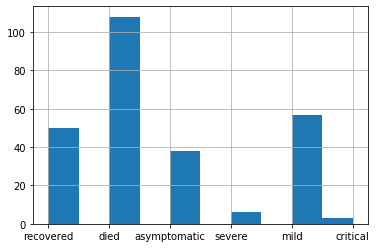

In [126]:
data_clean['Health Status'].hist()

In [127]:
# Sex -  M/F:
data_clean['Sex'] = pd.get_dummies(data_clean['Sex'])
data_clean['Sex'].value_counts() 

0    179
1     83
Name: Sex, dtype: int64

In [128]:
#print(data_clean['Nationality'].value_counts() )

def nationality_recode(series):
    if series != 'filipino':
        return 'other'
    else: 
        return 'filipino'

data_clean['Nationality'] = data_clean['Nationality'].apply(nationality_recode)
data_clean['Nationality'] = pd.get_dummies(data_clean['Nationality'])
data_clean['Nationality'].value_counts() 

1    241
0     21
Name: Nationality, dtype: int64

In [129]:
# disease_len_days cleaning - extract # days
data_clean['disease_len_days'] = data_clean["disease_len_days"].str.split(" ", 1, expand=True)[0]

In [130]:
data_clean['Population Density'] = data_clean.loc[:,'Population Density'].str.replace(',', '').astype(float)

In [131]:
data_clean=data_clean.drop(['phcaseno', 'History of Travel / Exposure', 'Travel History', 'Epi_Link', 'Date of Admission', 'Date of Lab Confirmation', 'Date of Admission', 'Symptoms', 'other_disease', 'Status', 'Date of Final Status (recovered/expired)', 'Final Diagnosis', 'Age Group', 'Location', 'Location 1', 'Location 2', 'Latitude', 'Longitude', 'Residence Lat', 'Residence Long', 'disease_len_days'], axis=1)

<a id='analysis&modeling_cell'></a>
# ANALYSIS & MODELING:

Libraries needed for analysis and modeling phase:

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
from math import floor

warnings.filterwarnings('ignore')

<a id='clustering_cell'></a>
## Clustering the target variable: 
Based on real-world application of results as well as underlying data.

In [133]:
def status_to_numeric(x):
    if x=='died':
        return 5
    if x=='critical':
        return 4
    if x=='severe':
        return 3
    if x=='mild':
        return 2
    if x=='asymptomatic':
        return 1
    if x=='recovered':
        return 0
    

data_clean['HealthStatusNUM'] = data_clean['Health Status'].apply(status_to_numeric)

In [134]:
# # split data using dates into train, val, test using most recent dates for test:
# train_pct, val_pct, test_pct = 0.6, 0.2, 0.2
# train_num, val_num, test_num = floor(data_clean.shape[0]*train_pct), floor(data_clean.shape[0]*val_pct), floor(data_clean.shape[0]*test_pct)

# train = data_clean.sort_values('Date of Onset of Symptoms', ascending=True).iloc[:train_num,:]
# train=train.reset_index(drop=True)

# val = data_clean.sort_values('Date of Onset of Symptoms', ascending=True).iloc[train_num:train_num+val_num,:]
# val=val.reset_index(drop=True)

# test = data_clean.sort_values('Date of Onset of Symptoms', ascending=True).iloc[train_num+val_num:train_num+val_num+test_num+1,:]
# test=test.reset_index(drop=True)

In [135]:
data_clean

,Sex,Age,Nationality,Residence in the Philippines,Date of Onset of Symptoms,Date of Announcement to the Public,Admission / Consultation,Health Status,symp_ body malaise,symp_ colds,...,Epi_Link_Exposure,geo_address,address,Travel History Binary,region_inc,average income (in thousand pesos),city,region,Population Density,HealthStatusNUM
0,1,38,0,None,2020-01-21 00:00:00-05:00,2020-01-30 00:00:00-05:00,san lazaro hospital,recovered,0.0,0.0,...,1,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1,NCR,460,Manila,Metro Manila,71263.0,0
1,0,44,0,None,2020-01-18 00:00:00-05:00,2020-02-02 00:00:00-05:00,san lazaro hospital,died,0.0,0.0,...,1,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1,NCR,460,Manila,Metro Manila,71263.0,5
2,1,60,0,None,2020-01-21 00:00:00-05:00,2020-02-05 00:00:00-05:00,ace medical center,recovered,0.0,0.0,...,0,"{'public_building': 'Francisco Duque Hall', 'r...","Francisco Duque Hall, Tayuman Street, Santa Cr...",1,NCR,460,Manila,Metro Manila,71263.0,0
3,0,48,1,Taguig City,2020-03-03 00:00:00-05:00,2020-03-06 00:00:00-05:00,university of the east ramon magsaysay memoria...,recovered,0.0,0.0,...,1,{'hospital': 'University of the East - Ramon M...,University of the East - Ramon Magsaysay Memor...,1,NCR,460,Galas,Metro Manila,20785.0,0
4,0,62,1,"Cainta, Rizal",2020-02-25 00:00:00-05:00,2020-03-06 00:00:00-05:00,research institute for tropical medicine,died,0.0,0.0,...,1,{'hospital': 'Research Institute for Tropical ...,"Research Institute for Tropical Medicine, Corp...",0,NCR,460,Muntinlupa,Metro Manila,12692.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1,21,1,"Pantukan, Compostela Valley",2020-03-03 00:00:00-05:00,2020-03-15 00:00:00-04:00,davao regional medical center,recovered,0.0,0.0,...,1,"{'hospital': 'Davao Regional Medical Center', ...","Davao Regional Medical Center, DRH - EPark Roa...",1,Davao,268,Davao Region,Davao Region,239.0,0
258,1,45,1,"Davao City, Davao Del Sur",NaN,2020-03-21 00:00:00-04:00,southern philippines medical center,mild,0.0,0.0,...,2,{'hospital': 'Southern Philippines Medical Cen...,"Southern Philippines Medical Center, J. P. Lau...",-1,Davao,268,Davao City,Davao Region,668.0,2
259,0,49,1,"Davao City, Davao Del Sur",2020-03-30 00:00:00-04:00,2020-03-29 00:00:00-04:00,southern philippines medical center,died,0.0,0.0,...,1,{'hospital': 'Southern Philippines Medical Cen...,"Southern Philippines Medical Center, J. P. Lau...",-1,Davao,268,Davao City,Davao Region,668.0,5
260,0,87,0,"Lambayong, Sultan Kudarat",2020-03-14 00:00:00-04:00,2020-03-25 00:00:00-04:00,st. louis hospital,died,0.0,0.0,...,1,"{'hospital': 'Saint Louis Hospital', 'road': '...","Saint Louis Hospital, Tacurong - Isulan Nation...",0,Soccsksargen,242,Tacurong,Soccsksargen,641.0,5


In [136]:
# select only numeric cols then normalize

df_num = data_clean.select_dtypes(include=[np.number])
df_num
# df_norm = (df_num - df_num.mean()) / (df_num.max() - df_num.min())

,Sex,Age,Nationality,symp_ body malaise,symp_ colds,symp_ comorbidity,symp_ cough,symp_ difficulty in breathing,symp_ dizziness,symp_ dysphagia,...,dis_prostatic cancer,dis_remnal disease,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_with comorbid (not specified),Epi_Link_Exposure,Travel History Binary,average income (in thousand pesos),Population Density,HealthStatusNUM
0,1,38,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,460,71263.0,0
1,0,44,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,460,71263.0,5
2,1,60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,460,71263.0,0
3,0,48,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,460,20785.0,0
4,0,62,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,460,12692.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1,21,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,268,239.0,0
258,1,45,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,-1,268,668.0,2
259,0,49,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,-1,268,668.0,5
260,0,87,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,242,641.0,5


In [137]:
df_num = df_num.drop(['HealthStatusNUM'], axis=1)
df_num

,Sex,Age,Nationality,symp_ body malaise,symp_ colds,symp_ comorbidity,symp_ cough,symp_ difficulty in breathing,symp_ dizziness,symp_ dysphagia,...,dis_permanent atrial fibrillation,dis_prostatic cancer,dis_remnal disease,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_with comorbid (not specified),Epi_Link_Exposure,Travel History Binary,average income (in thousand pesos),Population Density
0,1,38,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,460,71263.0
1,0,44,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,460,71263.0
2,1,60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,460,71263.0
3,0,48,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,460,20785.0
4,0,62,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,460,12692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1,21,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,268,239.0
258,1,45,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,-1,268,668.0
259,0,49,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-1,268,668.0
260,0,87,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,242,641.0


In [138]:
# data_clean[df_norm.columns] = df_norm

In [70]:
data_clean.columns

Index(['Sex', 'Age', 'Nationality', 'Residence in the Philippines',
       'Date of Onset of Symptoms', 'Date of Announcement to the Public',
       'Admission / Consultation', 'Health Status', 'symp_ body malaise',
       'symp_ colds', 'symp_ comorbidity', 'symp_ cough',
       'symp_ difficulty in breathing', 'symp_ dizziness', 'symp_ dysphagia',
       'symp_ headache', 'symp_ shortness of breath', 'symp_ sore throat',
       'symp_asymptomatic', 'symp_cough', 'symp_difficulty of breathing',
       'symp_dyspnea', 'symp_fever', 'symp_sore throat', 'dis_  diabetes',
       'dis_  renal disease', 'dis_ acute kidney injury', 'dis_ asthma',
       'dis_ atherosclerosis', 'dis_ atherosclerotic cardiovascular disease',
       'dis_ benign prostatic hyperplasia',
       'dis_ benign prostatic hypertrophy', 'dis_ bronchial asthma',
       'dis_ cardiac disease', 'dis_ cardiac dysrhythmia',
       'dis_ cardiomyopathy', 'dis_ cardiovascular disease',
       'dis_ cerebrovascular accident in

In [73]:
data_clean.select_dtypes(include=[np.number]).columns

Index(['Sex', 'Age', 'Nationality', 'symp_ body malaise', 'symp_ colds',
       'symp_ comorbidity', 'symp_ cough', 'symp_ difficulty in breathing',
       'symp_ dizziness', 'symp_ dysphagia', 'symp_ headache',
       'symp_ shortness of breath', 'symp_ sore throat', 'symp_asymptomatic',
       'symp_cough', 'symp_difficulty of breathing', 'symp_dyspnea',
       'symp_fever', 'symp_sore throat', 'dis_  diabetes',
       'dis_  renal disease', 'dis_ acute kidney injury', 'dis_ asthma',
       'dis_ atherosclerosis', 'dis_ atherosclerotic cardiovascular disease',
       'dis_ benign prostatic hyperplasia',
       'dis_ benign prostatic hypertrophy', 'dis_ bronchial asthma',
       'dis_ cardiac disease', 'dis_ cardiac dysrhythmia',
       'dis_ cardiomyopathy', 'dis_ cardiovascular disease',
       'dis_ cerebrovascular accident infarc',
       'dis_ cerebrovascular disease infarction',
       'dis_ chronic kidney disease',
       'dis_ chronic obstructive pulmonary disease', 'dis_ colo

In [75]:
data_clean['Nationality']

0     -0.919847
1     -0.919847
2     -0.919847
3      0.080153
4      0.080153
         ...   
257    0.080153
258    0.080153
259    0.080153
260   -0.919847
261    0.080153
Name: Nationality, Length: 262, dtype: float64

In [76]:
data_clean['Epi_Link_Exposure']

0     -0.019084
1     -0.019084
2     -0.352417
3     -0.019084
4     -0.019084
         ...   
257   -0.019084
258    0.314249
259   -0.019084
260   -0.019084
261   -0.019084
Name: Epi_Link_Exposure, Length: 262, dtype: float64

In [78]:
data_clean['Age']

0     -0.216859
1     -0.143688
2      0.051434
3     -0.094908
4      0.075824
         ...   
257   -0.424176
258   -0.131493
259   -0.082713
260    0.380702
261    0.027043
Name: Age, Length: 262, dtype: float64

In [80]:
# data_clean['dis_ hypertensive cardiovascular disease']

In [139]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_num)
x_scaled

array([[1.        , 0.37804878, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.45121951, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.64634146, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.51219512, 1.        , ..., 0.        , 0.35785953,
        0.00604021],
       [0.        , 0.97560976, 0.        , ..., 0.5       , 0.27090301,
        0.00566006],
       [0.        , 0.62195122, 1.        , ..., 1.        , 0.        ,
        0.02908876]])

In [141]:
# df_normalized = pd.DataFrame(data=x_scaled, columns = df_num.columns.drop(HealthStatusNUM))
df_normalized = pd.DataFrame(data=x_scaled, columns = df_num.columns)
df_normalized

,Sex,Age,Nationality,symp_ body malaise,symp_ colds,symp_ comorbidity,symp_ cough,symp_ difficulty in breathing,symp_ dizziness,symp_ dysphagia,...,dis_permanent atrial fibrillation,dis_prostatic cancer,dis_remnal disease,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_with comorbid (not specified),Epi_Link_Exposure,Travel History Binary,average income (in thousand pesos),Population Density
0,1.0,0.378049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.0,1.000000,1.000000
1,0.0,0.451220,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.0,1.000000,1.000000
2,1.0,0.646341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.000000,1.000000
3,0.0,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.0,1.000000,0.289282
4,0.0,0.670732,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.5,1.000000,0.175335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1.0,0.170732,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.357860,0.000000
258,1.0,0.463415,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.357860,0.006040
259,0.0,0.512195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.357860,0.006040
260,0.0,0.975610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.5,0.270903,0.005660


In [142]:
data_clean[df_normalized.columns] = df_normalized
data_clean

,Sex,Age,Nationality,Residence in the Philippines,Date of Onset of Symptoms,Date of Announcement to the Public,Admission / Consultation,Health Status,symp_ body malaise,symp_ colds,...,Epi_Link_Exposure,geo_address,address,Travel History Binary,region_inc,average income (in thousand pesos),city,region,Population Density,HealthStatusNUM
0,1.0,0.378049,0.0,None,2020-01-21 00:00:00-05:00,2020-01-30 00:00:00-05:00,san lazaro hospital,recovered,0.0,0.0,...,0.333333,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1.0,NCR,1.000000,Manila,Metro Manila,1.000000,0
1,0.0,0.451220,0.0,None,2020-01-18 00:00:00-05:00,2020-02-02 00:00:00-05:00,san lazaro hospital,died,0.0,0.0,...,0.333333,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1.0,NCR,1.000000,Manila,Metro Manila,1.000000,5
2,1.0,0.646341,0.0,None,2020-01-21 00:00:00-05:00,2020-02-05 00:00:00-05:00,ace medical center,recovered,0.0,0.0,...,0.000000,"{'public_building': 'Francisco Duque Hall', 'r...","Francisco Duque Hall, Tayuman Street, Santa Cr...",1.0,NCR,1.000000,Manila,Metro Manila,1.000000,0
3,0.0,0.500000,1.0,Taguig City,2020-03-03 00:00:00-05:00,2020-03-06 00:00:00-05:00,university of the east ramon magsaysay memoria...,recovered,0.0,0.0,...,0.333333,{'hospital': 'University of the East - Ramon M...,University of the East - Ramon Magsaysay Memor...,1.0,NCR,1.000000,Galas,Metro Manila,0.289282,0
4,0.0,0.670732,1.0,"Cainta, Rizal",2020-02-25 00:00:00-05:00,2020-03-06 00:00:00-05:00,research institute for tropical medicine,died,0.0,0.0,...,0.333333,{'hospital': 'Research Institute for Tropical ...,"Research Institute for Tropical Medicine, Corp...",0.5,NCR,1.000000,Muntinlupa,Metro Manila,0.175335,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1.0,0.170732,1.0,"Pantukan, Compostela Valley",2020-03-03 00:00:00-05:00,2020-03-15 00:00:00-04:00,davao regional medical center,recovered,0.0,0.0,...,0.333333,"{'hospital': 'Davao Regional Medical Center', ...","Davao Regional Medical Center, DRH - EPark Roa...",1.0,Davao,0.357860,Davao Region,Davao Region,0.000000,0
258,1.0,0.463415,1.0,"Davao City, Davao Del Sur",NaN,2020-03-21 00:00:00-04:00,southern philippines medical center,mild,0.0,0.0,...,0.666667,{'hospital': 'Southern Philippines Medical Cen...,"Southern Philippines Medical Center, J. P. Lau...",0.0,Davao,0.357860,Davao City,Davao Region,0.006040,2
259,0.0,0.512195,1.0,"Davao City, Davao Del Sur",2020-03-30 00:00:00-04:00,2020-03-29 00:00:00-04:00,southern philippines medical center,died,0.0,0.0,...,0.333333,{'hospital': 'Southern Philippines Medical Cen...,"Southern Philippines Medical Center, J. P. Lau...",0.0,Davao,0.357860,Davao City,Davao Region,0.006040,5
260,0.0,0.975610,0.0,"Lambayong, Sultan Kudarat",2020-03-14 00:00:00-04:00,2020-03-25 00:00:00-04:00,st. louis hospital,died,0.0,0.0,...,0.333333,"{'hospital': 'Saint Louis Hospital', 'road': '...","Saint Louis Hospital, Tacurong - Isulan Nation...",0.5,Soccsksargen,0.270903,Tacurong,Soccsksargen,0.005660,5


In [143]:
data_clean.columns

Index(['Sex', 'Age', 'Nationality', 'Residence in the Philippines',
       'Date of Onset of Symptoms', 'Date of Announcement to the Public',
       'Admission / Consultation', 'Health Status', 'symp_ body malaise',
       'symp_ colds', 'symp_ comorbidity', 'symp_ cough',
       'symp_ difficulty in breathing', 'symp_ dizziness', 'symp_ dysphagia',
       'symp_ headache', 'symp_ shortness of breath', 'symp_ sore throat',
       'symp_asymptomatic', 'symp_cough', 'symp_difficulty of breathing',
       'symp_dyspnea', 'symp_fever', 'symp_sore throat', 'dis_  diabetes',
       'dis_  renal disease', 'dis_ acute kidney injury', 'dis_ asthma',
       'dis_ atherosclerosis', 'dis_ atherosclerotic cardiovascular disease',
       'dis_ benign prostatic hyperplasia',
       'dis_ benign prostatic hypertrophy', 'dis_ bronchial asthma',
       'dis_ cardiac disease', 'dis_ cardiac dysrhythmia',
       'dis_ cardiomyopathy', 'dis_ cardiovascular disease',
       'dis_ cerebrovascular accident in

In [96]:
data_clean['Age'] = data_clean['Age'].astype(float)

In [144]:
cols_to_standardize = ['Age', 'Nationality','Epi_Link_Exposure','average income (in thousand pesos)','Population Density',]

In [145]:
# from master  
train, val, test = np.split(data_clean.sample(frac=1), [int(.6*len(data_clean)), int(.8*len(data_clean))])

In [146]:
train=train.reset_index(drop=True)
val=val.reset_index(drop=True)
test=test.reset_index(drop=True)

In [147]:
# begin clustering using train data
# why are we clustering here
data_numeric = train.select_dtypes(include=['float', 'int'])
data_numeric = data_numeric.drop('HealthStatusNUM', axis=1)


In [148]:
data_numeric = StandardScaler().fit_transform(data_clean[cols_to_standardize])

In [149]:
data_numeric

array([[-1.03462061, -3.38765265, -0.18124986,  0.21188796,  1.25751281],
       [-0.68552776, -3.38765265, -0.18124986,  0.21188796,  1.25751281],
       [ 0.24538652, -3.38765265, -3.34708072,  0.21188796,  1.25751281],
       ...,
       [-0.39461705,  0.29518965, -0.18124986, -4.89535293, -1.37816116],
       [ 1.81630435, -3.38765265, -0.18124986, -5.58695846, -1.37916921],
       [ 0.12902223,  0.29518965, -0.18124986, -7.74157571, -1.31704354]])

In [150]:
####################

In [151]:
# within cluster sum of errors 
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=6)
    kmeans.fit(data_numeric)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

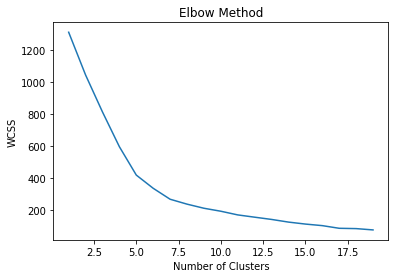

In [152]:
#Plot the elbow method to see if we found the optimal number of clusters
# https://www.linkedin.com/pulse/finding-optimal-number-clusters-k-means-through-elbow-asanka-perera/
import matplotlib.pyplot as plt 

#fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15,8))
plt.plot(range(1,20), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

In [153]:
# Going to try with 12 clusters to start
status_kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=100, n_init=5)
status_cluster = status_kmeans.fit_predict(data_numeric)

In [154]:
pd.DataFrame(train)['Cluster'] = pd.DataFrame(status_cluster)

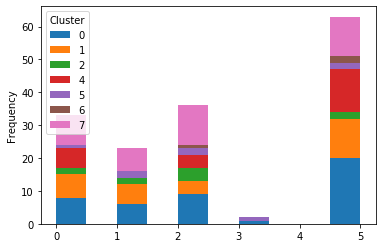

In [155]:
train.pivot(columns='Cluster').HealthStatusNUM.plot(kind = 'hist', stacked=True)

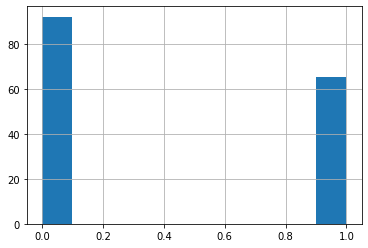

In [233]:
# recode to 2 categories based on the graph above as well as "business understanding":

def health_status_binary(series):
    if series > 2:
        return 1
    else:
        return 0
    
train['Health Status Binary'] = train['HealthStatusNUM'].apply(health_status_binary)
val['Health Status Binary'] = val['HealthStatusNUM'].apply(health_status_binary)
test['Health Status Binary'] = test['HealthStatusNUM'].apply(health_status_binary)

train['Health Status Binary'].hist()

In [234]:
data_numeric
train['HealthStatusNUM']

0      0
1      2
2      5
3      0
4      3
      ..
152    5
153    1
154    0
155    0
156    5
Name: HealthStatusNUM, Length: 157, dtype: int64

Standardize the feature data for modeling:

In [235]:
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer

# why do we standardize but not normalize 


# imp = SimpleImputer(strategy="mean")
# If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.
standardize = preprocessing.StandardScaler()
cols_drop = ['Health Status Binary','HealthStatusNUM', 'Health Status', 'Date of Onset of Symptoms']



In [236]:
X_train, y_train = train.drop(cols_drop, axis=1), train['Health Status Binary']
X_val, y_val = val.drop(cols_drop, axis=1), val['Health Status Binary']
X_test, y_test = test.drop(cols_drop, axis=1), test['Health Status Binary']



In [174]:
X_train.head()

,Sex,Age,Nationality,Residence in the Philippines,Date of Announcement to the Public,Admission / Consultation,symp_ body malaise,symp_ colds,symp_ comorbidity,symp_ cough,...,Epi_Link_Exposure,geo_address,address,Travel History Binary,region_inc,average income (in thousand pesos),city,region,Population Density,Cluster
0,0.0,0.792683,1.0,"Batangas City, Batangas",2020-03-11 00:00:00-04:00,asian hospital and medical center,0.0,0.0,0.0,0.0,...,0.333333,"{'public_building': 'Francisco Duque Hall', 'r...","Asian Hospital and Medical Center, 2205, Civic...",1.0,NCR,1.0,Manila,Metro Manila,1.000000,2
1,0.0,0.475610,1.0,"Davao City, Davao Del Sur",2020-03-21 00:00:00-04:00,southern philippines medical center,0.0,0.0,0.0,0.0,...,0.666667,"{'public_building': 'Francisco Duque Hall', 'r...","Francisco Duque Hall, Tayuman Street, Santa Cr...",0.0,NCR,1.0,Manila,Metro Manila,1.000000,2
2,0.0,0.829268,0.0,Quezon City,2020-03-28 00:00:00-04:00,st. luke's medical center global city,0.0,0.0,0.0,0.0,...,0.333333,"{'hospital': ""St. Luke's Medical Center Global...","St. Luke's Medical Center Global City, 32nd St...",0.0,NCR,1.0,Taguig,Metro Manila,0.247311,2
3,1.0,0.463415,1.0,Makati City,2020-03-13 00:00:00-04:00,the medical city - ortigas,0.0,0.0,0.0,0.0,...,0.333333,"{'hospital': 'The Medical City', 'road': 'Orti...","The Medical City, Ortigas Avenue, Ugong, Pasig...",0.5,NCR,1.0,Pasig,Metro Manila,0.216082,7
4,0.0,0.317073,1.0,"Porac, Pampanga",2020-03-13 00:00:00-04:00,marikina valley medical center,0.0,0.0,0.0,0.0,...,0.333333,"{'hospital': 'Marikina Valley Medical Center',...","Marikina Valley Medical Center, Sumulong Highw...",0.5,NCR,1.0,Marikina,Metro Manila,0.291535,0


In [237]:
X_train = X_train.select_dtypes(include=['float', 'int64'])
X_val = X_val.select_dtypes(include=['float', 'int64'])
X_test = X_test.select_dtypes(include=['float', 'int64'])


In [170]:

# X_train = standardize.fit_transform(imp.fit_transform(X_train[cols_to_standardize]))
# X_val = standardize.fit_transform(imp.fit_transform(X_val[cols_to_standardize]))
# X_test = standardize.fit_transform(imp.fit_transform(X_test[cols_to_standardize]))

# X_train = standardize.fit_transform(X_train[cols_to_standardize])
# X_val = standardize.fit_transform(X_val[cols_to_standardize])
# X_test = standardize.fit_transform(X_test[cols_to_standardize])


In [239]:
X_train

,Sex,Age,Nationality,symp_ body malaise,symp_ colds,symp_ comorbidity,symp_ cough,symp_ difficulty in breathing,symp_ dizziness,symp_ dysphagia,...,dis_permanent atrial fibrillation,dis_prostatic cancer,dis_remnal disease,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_with comorbid (not specified),Epi_Link_Exposure,Travel History Binary,average income (in thousand pesos),Population Density
0,0.0,0.792683,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.0,1.0,1.000000
1,0.0,0.475610,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,1.0,1.000000
2,0.0,0.829268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,1.0,0.247311
3,1.0,0.463415,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.5,1.0,0.216082
4,0.0,0.317073,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.5,1.0,0.291535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.0,0.536585,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,1.0,0.216082
153,0.0,0.353659,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.0,1.0,1.000000
154,1.0,0.256098,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.5,1.0,0.216082
155,1.0,0.378049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.0,1.0,1.000000


In [238]:
y_train

0      0
1      0
2      1
3      0
4      1
      ..
152    1
153    0
154    0
155    0
156    1
Name: Health Status Binary, Length: 157, dtype: int64

# X TRAIN , X TEST

In [171]:
# normalize and standardize 
train.describe()

,Sex,Age,Nationality,symp_ body malaise,symp_ colds,symp_ comorbidity,symp_ cough,symp_ difficulty in breathing,symp_ dizziness,symp_ dysphagia,...,dis_status post renal transplant,dis_systemic lupus erythematosus,dis_with comorbid (not specified),Epi_Link_Exposure,Travel History Binary,average income (in thousand pesos),Population Density,HealthStatusNUM,Cluster,Health Status Binary
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.292994,0.585599,0.898089,0.006369,0.012739,0.006369,0.025478,0.006369,0.006369,0.006369,...,0.006369,0.006369,0.006369,0.352442,0.468153,0.966001,0.524663,2.649682,3.050955,0.414013
std,0.456592,0.206407,0.303499,0.079809,0.112504,0.079809,0.158075,0.079809,0.079809,0.079809,...,0.079809,0.079809,0.079809,0.114740,0.333405,0.132383,0.385530,2.053347,2.823428,0.494127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.270903,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.426829,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.000000,1.000000,0.216082,1.000000,0.000000,0.000000
50%,0.000000,0.609756,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.500000,1.000000,0.289282,2.000000,2.000000,0.000000
75%,1.000000,0.756098,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.500000,1.000000,1.000000,5.000000,7.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,1.000000


In [58]:
train.groupby('Health Status Binary').describe()

Sex                                                Age  \
                     count      mean       std  min  25%  50%  75%  max count   
Health Status Binary                                                            
0                     88.0  0.352273  0.480416  0.0  0.0  0.0  1.0  1.0  88.0   
1                     69.0  0.260870  0.442326  0.0  0.0  0.0  1.0  1.0  69.0   

                                 ... HealthStatusNUM      Cluster            \
                           mean  ...             75%  max   count      mean   
Health Status Binary             ...                                          
0                     48.102273  ...             2.0  2.0    88.0  0.477273   
1                     66.347826  ...             5.0  5.0    69.0  0.405797   

                                                         
                           std  min  25%  50%  75%  max  
Health Status Binary                                     
0                     1.774515  0.0  0.0  0.0  0.0  7.0  
1                     1.375402  0.0  0.0  0.0  0.0  7.0  

[2 rows x 720 columns]

In [59]:
train.shape

(157, 101)

In [29]:
# X_train
# imp
# not normalized 
# train
print(len(np.ptp(X_train,axis=1)))
np.ptp(X_train,axis=1)

157


array([13.30801269,  1.13044232,  5.4471172 ,  5.04714655,  6.3316362 ,
       13.28932943,  2.57198276,  3.18461021,  1.02077907,  2.13776144,
        7.04906396,  1.40958474,  3.18461021,  2.13776144,  2.26777304,
       13.04527371,  2.70467302,  6.27351015,  2.67636301,  9.73108838,
        6.87335001,  0.83328296,  3.58959489,  8.57763217,  1.02077907,
        2.70467302, 13.90289974, 12.82685677,  1.26568431,  3.21380442,
       13.04527371, 13.90289974,  1.54977411,  2.94636615,  2.54864044,
        9.4244178 ,  2.20204139,  3.49833428,  1.84704698,  1.66289541,
        1.02077907, 12.70602069,  3.21380442,  0.9367317 ,  0.9367317 ,
        9.62142513, 13.11100536, 13.80368512, 13.04527371, 13.06505165,
        9.53737776,  1.63329953, 13.11100536,  1.61566612,  2.78999893,
        1.85735926, 13.40595941,  2.70467302, 13.11100536,  2.13776144,
       13.90289974,  1.09471581, 13.90289974,  4.30684051,  6.81092788,
        4.38148927,  2.42191004,  1.61566612,  7.55516552,  3.24

In [172]:
print(len(np.ptp(X_train,axis=1)))
np.ptp(X_train,axis=1)

# standardization looks bad... 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 
# we dont have gaussian data

157


array([1.40395848, 3.28192465, 4.15289349, 1.1398279 , 1.64197797,
       4.94537908, 2.24564733, 1.58270594, 1.27601077, 4.20547579,
       1.52919226, 2.66055153, 1.40395848, 1.58270594, 1.77147111,
       1.80945902, 1.40395848, 1.40395848, 1.50043742, 1.3352828 ,
       5.00431633, 1.40395848, 1.40395848, 1.70125   , 1.70125   ,
       1.08553322, 2.12710328, 1.50963339, 2.00855922, 1.16780175,
       1.70125   , 2.00540656, 1.81979405, 1.1398279 , 1.85621547,
       1.40395848, 1.1398279 , 1.52523437, 1.14480525, 1.78746942,
       3.7379893 , 1.32262133, 3.27263609, 1.40395848, 2.3801897 ,
       0.94935035, 1.0843956 , 1.63164294, 1.88482443, 7.16304998,
       1.76052203, 4.52663723, 1.40395848, 1.79679756, 3.22622862,
       1.2633493 , 1.24585638, 1.89001516, 4.0830802 , 1.32262133,
       1.34561783, 1.86873105, 1.05087243, 1.22057847, 1.1398279 ,
       0.95854633, 2.71982356, 1.44116539, 1.79694344, 3.22622862,
       1.05856627, 3.64590707, 1.20407728, 2.0931577 , 1.82555

In [240]:
X_train.max().to_list()

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0]

In [241]:
X_train.min().to_list()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.27090301003344486,
 0.0]

This makes more sense now, since our data is normalized, and we want to keep the binary columns binary.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

<a id='modeling_cell'></a>
## Modeling:

NAIVE BAYES:

In [183]:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_val)

In [184]:

from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_val, y_pred))

cm = metrics.confusion_matrix(y_val, y_pred)
cm 

Accuracy: 0.6923076923076923


array([[28,  0],
       [16,  8]])

## Trees:

DECISION TREE:

In [42]:

import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from pprint import pprint


# from yellowbrick.features import RFECV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.model_selection as model_selection

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

import mca

from random import sample

from sklearn import preprocessing

from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from collections import Counter


# from imblearn.datasets import make_imbalance
# from imblearn.under_sampling import NearMiss
# from imblearn.pipeline import make_pipeline
# from imblearn.metrics import classification_report_imbalanced
 

from sklearn import tree
import pydotplus

In [203]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
dtree_model = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_val) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_val, dtree_predictions)
print(cm)

print("Validation Accuracy:", metrics.accuracy_score(y_val, dtree_predictions))
dtree_model.score(X_val,  y_val)

[[27  1]
 [ 8 16]]
Validation Accuracy: 0.8269230769230769


0.8269230769230769

In [186]:
y_pred = dtree_model.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        28
           1       0.94      0.71      0.81        24

    accuracy                           0.85        52
   macro avg       0.87      0.84      0.84        52
weighted avg       0.86      0.85      0.84        52



In [187]:
print(confusion_matrix(y_val,dtree_predictions))

[[27  1]
 [ 7 17]]


In [188]:
feature_importance = dtree_model.feature_importances_
print(np.count_nonzero(feature_importance))
important_features = np.argsort(feature_importance)
important_features = important_features[-9:]
important_features

8


array([79,  0,  2,  9, 85, 87, 71,  1, 72])

In [189]:
train.iloc[:,important_features].columns 
# TO DO: test with just these for more advanced models


Index(['dis_hypertensive cardiovascular disease', 'Sex', 'Nationality',
       'symp_ colds', 'dis_remnal disease', 'dis_systemic lupus erythematosus',
       'dis_cardiac disease', 'Age', 'dis_chronic kidney disease'],
      dtype='object')

In [190]:
feature_list = list(train.drop(cols_drop, axis=1).select_dtypes(include=['float', 'int64']))
# feature_list

In [191]:
len(feature_list)

88

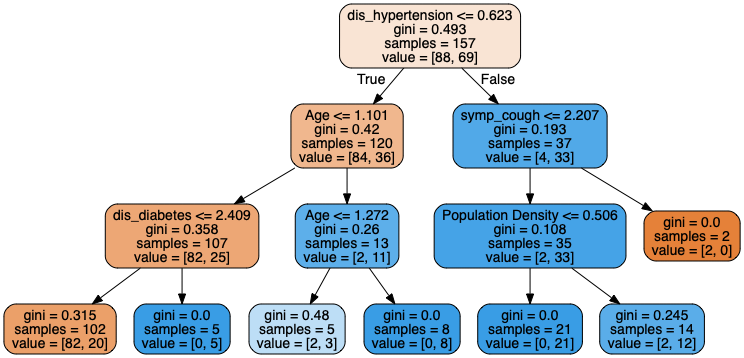

In [54]:
# old, dont run
dtree_baseline = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_baseline.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(dtree_baseline, out_file=dot_data,feature_names=feature_list,filled=True,rounded=True)
 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

#note: double click the image to expand it

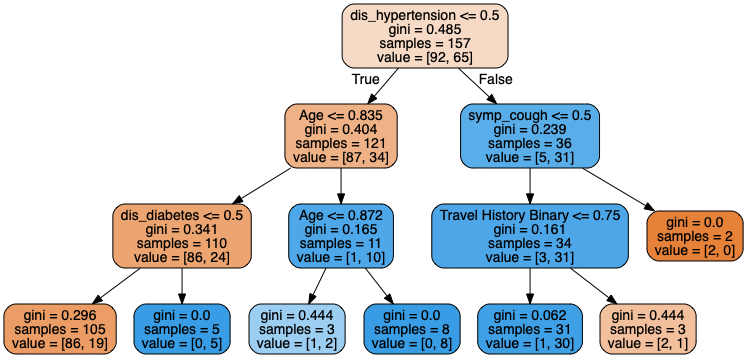

In [192]:
dtree_baseline = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_baseline.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(dtree_baseline, out_file=dot_data,feature_names=feature_list,filled=True,rounded=True)
 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

#note: double click the image to expand it

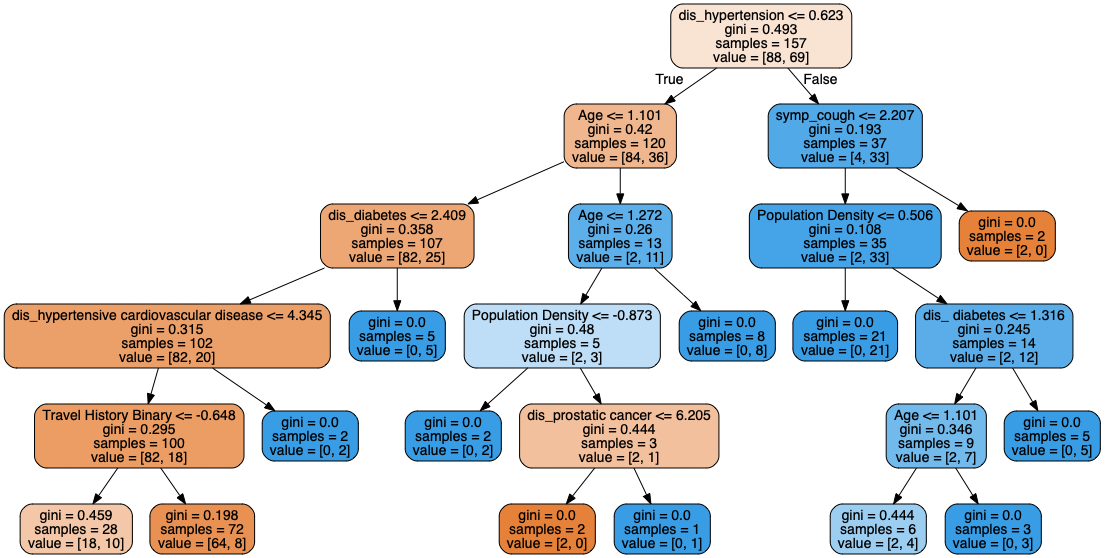

In [55]:

dot_data = StringIO()  
export_graphviz(dtree_model, out_file=dot_data,feature_names=feature_list,filled=True,rounded=True)
 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())



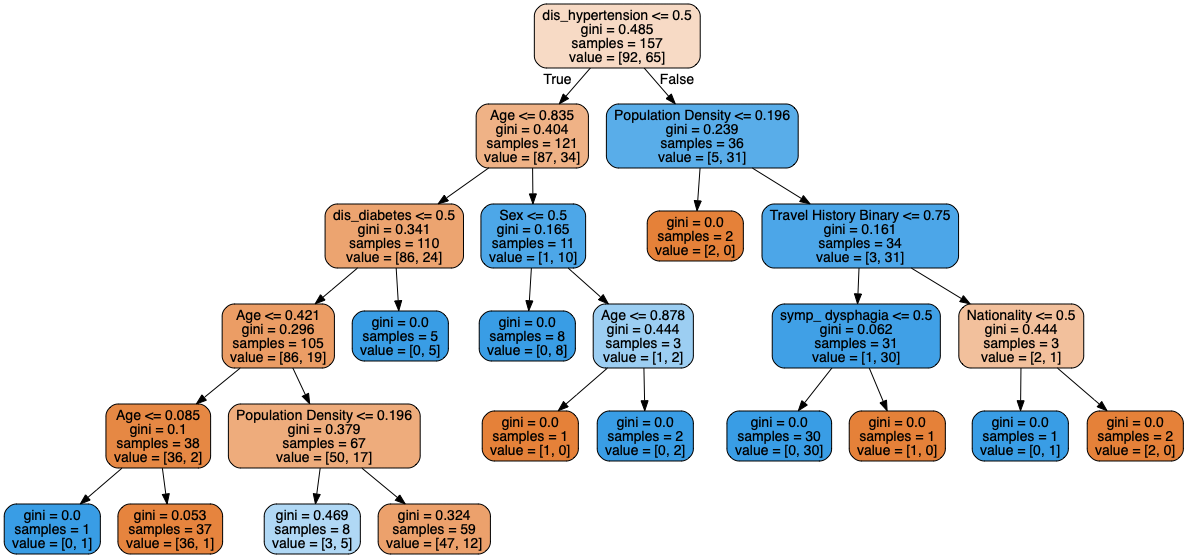

In [193]:
dot_data = StringIO()  
export_graphviz(dtree_model, out_file=dot_data,feature_names=feature_list,filled=True,rounded=True)
 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())


RANDOM FOREST:

In [244]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0) 
clf.fit(X_train, y_train)
rf_preds = clf.predict(X_val)
cm = confusion_matrix(y_val, rf_preds)
print(cm)
clf.score(X_val,  y_val)

[[28  0]
 [11 13]]


0.7884615384615384

XGBoost:

In [202]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_val)
cm = confusion_matrix(y_val, y_preds)
print(cm)
model.score(X_val,  y_val)

[[28  0]
 [ 8 16]]


0.8461538461538461

## Linear models: 

In [213]:
# SVM: 

# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_val) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_val, y_val) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_val, svm_predictions) 
print(cm)

print(accuracy)
# choose logreg

[[28  0]
 [ 9 15]]
0.8269230769230769


Logistic Regression

In [214]:

# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(logreg.score(X_val, y_val)))

Accuracy of logistic regression classifier on validation set: 0.81


In [215]:
logreg.score(X_val, y_val)

0.8076923076923077

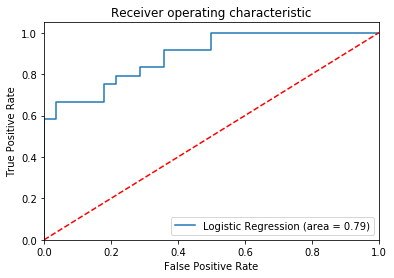

In [216]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_val, logreg.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, logreg.predict_proba(X_val)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [217]:
# KNN

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_val, y_val) 
print(accuracy)
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_val)  
cm = confusion_matrix(y_val, knn_predictions)

0.7692307692307693


Neural Network: 

In [114]:
# Neural Network References:
# https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/
# https://shrikar.com/deep-learning-with-keras-and-python-for-multiclass-classification/
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

# new binary: https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

In [35]:
X_train.shape

(157, 86)

In [116]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_val, y_val)
print('Accuracy: %.2f' % (accuracy*100))

Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/150
157/157 [==============================] - 0s 1ms/step - loss: 0.7232 - accuracy: 0.5605
Epoch 2/150
157/157 [==============================] - 0s 153us/step - loss: 0.6779 - accuracy: 0.6369
Epoch 3/150
157/157 [==============================] - 0s 180us/step - loss: 0.6416 - accuracy: 0.6879
Epoch 4/150
157/157 [==============================] - 0s 189us/step - loss: 0.6104 - accuracy: 0.7325
Epoch 5/150
157/157 [==============================] - 0s 149us/step - loss: 0.5804 - accuracy: 0.7707
Epoch 6/150
157/157 [==============================] - 0s 124us/step - loss: 0.5504 - accuracy: 0.8025
Epoch 7/150
157/157 [==============================] - 0s 127us/step - loss: 0.5204 - accuracy: 0.8025
Epoch 8/150
157/157 [==============================] - 0s 122us/step - loss: 0.4918 - accuracy: 0.8217
Epoch 9/150
157/157 [==============================] - 0s 264us/step - loss: 0.4617

Model Performance of XGBoost and Random Forest on Subet of Features:

In [218]:
imp = SimpleImputer(strategy="mean")
standardize = preprocessing.StandardScaler()
cols_drop = ['Health Status Binary']

train_f=train.iloc[:,np.append(important_features, 100)]
val_f=val.iloc[:,np.append(important_features, 99)]
test_f=test.iloc[:,np.append(important_features, 99)]

X_train, y_train = train_f.drop(cols_drop, axis=1), train['Health Status Binary']
X_val, y_val = val_f.drop(cols_drop, axis=1), val['Health Status Binary']
X_test, y_test = test_f.drop(cols_drop, axis=1), test['Health Status Binary']

X_train = X_train.select_dtypes(include=['float', 'int64'])
X_val = X_val.select_dtypes(include=['float', 'int64'])
X_test = X_test.select_dtypes(include=['float', 'int64'])

X_train = standardize.fit_transform(imp.fit_transform(X_train))
X_val = standardize.fit_transform(imp.fit_transform(X_val))
X_test = standardize.fit_transform(imp.fit_transform(X_test))

In [224]:
#Random Forest
clf = RandomForestClassifier(max_depth=10, random_state=0) 
clf.fit(X_train, y_train)
rf_preds = clf.predict(X_val)
cm = confusion_matrix(y_val, rf_preds)
print(cm)
clf.score(X_val,  y_val)

[[20  8]
 [16  8]]


0.5384615384615384

In [223]:
#XGBoost
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_val)
cm = confusion_matrix(y_val, y_preds)
print(cm)
model.score(X_val,  y_val)

[[19  9]
 [15  9]]


0.5384615384615384

Feature selection resulted in worse accuracy

Hyperparameter Tuning -- going back to original train 
Adapted from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [265]:
imp = SimpleImputer(strategy="mean")
standardize = preprocessing.StandardScaler()
cols_drop = ['Health Status Binary','HealthStatusNUM', 'Health Status', 'Date of Onset of Symptoms']

X_train, y_train = train.drop(cols_drop, axis=1), train['Health Status Binary']
X_val, y_val = val.drop(cols_drop, axis=1), val['Health Status Binary']
X_test, y_test = test.drop(cols_drop, axis=1), test['Health Status Binary']

X_train = X_train.select_dtypes(include=['float', 'int64'])
X_val = X_val.select_dtypes(include=['float', 'int64'])
X_test = X_test.select_dtypes(include=['float', 'int64'])

X_train = standardize.fit_transform(imp.fit_transform(X_train))
X_val = standardize.fit_transform(imp.fit_transform(X_val))
X_test = standardize.fit_transform(imp.fit_transform(X_test))

In [267]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [268]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [269]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [271]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=2000, min_samples_leaf=1) 
clf.fit(X_train, y_train)
rf_preds = clf.predict(X_val)
cm = confusion_matrix(y_val, rf_preds)
print(cm)
clf.score(X_val,  y_val)

[[31  1]
 [ 6 14]]


0.8653846153846154

Improved by 0.04! 

# XGBOOST HYPERPARAMETER TUNING

#### Best model hyper parameter tuning
- svm
- xgboost

In [226]:
from sklearn import inspection
# import mlxtend

# from mlxtend.evaluate import feature_importance_permutation

In [265]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)
y_preds = gbm.predict(X_val)
cm_gbm = confusion_matrix(y_val, y_preds)
gbm.score(X_val,  y_val)

0.8461538461538461

In [268]:
importance_vals = gbm.feature_importances_
importance_vals

array([1.62398318e-02, 2.75422701e-01, 9.23670046e-03, 0.00000000e+00,
       1.04006922e-02, 0.00000000e+00, 2.69812189e-03, 3.26710694e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.60204833e-03, 0.00000000e+00, 2.06138787e-02, 0.00000000e+00,
       0.00000000e+00, 2.40077026e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.38808848e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.93365668e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.89037248e-06, 2.42033520e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.11540646e-03, 0.00000000e+00,
       3.15238759e-02, 6.96571205e-03, 8.18449378e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.10608649e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.24221926e-03, 0.00000000e+00, 0.00000000e+00,
      

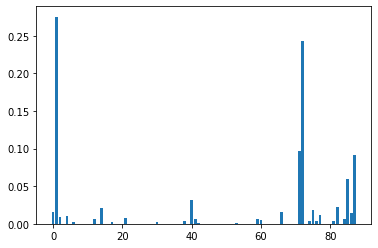

In [253]:
from matplotlib import pyplot
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

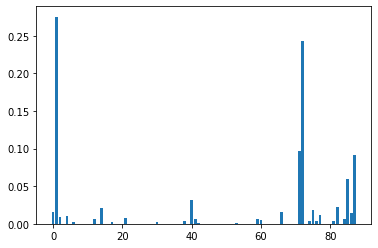

In [254]:
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [263]:
# using xgboost built in
# plot feature importance
# from xgboost import XGBClassifier
# from xgboost import plot_importance
# plot_importance(model)
# pyplot.show()

In [287]:
# !conda install xgboost
# gbm.estimators_

In [270]:
std = np.std([gbm.feature_importances_ for tree in gbm.estimators_],
             axis=0)
indices = np.argsort(importance_vals)[::-1]

In [272]:
std
indices

array([ 1, 72, 71, 87, 85, 40, 82, 14, 75,  0, 66, 86, 77,  4,  2, 21, 59,
       41, 84, 12, 60, 38, 81, 76, 74,  6, 30, 17, 53, 42,  7, 25, 67, 48,
       29, 22, 80, 18, 20, 24, 26, 19, 27, 23, 65, 16, 15, 28, 13, 79, 11,
       10,  9,  8,  5, 73,  3, 78, 83, 32, 31, 64, 63, 62, 61, 68, 58, 57,
       56, 55, 54, 52, 51, 50, 49, 47, 46, 45, 44, 69, 70, 39, 37, 36, 35,
       34, 33, 43])

In [273]:
feature_list = X_train.columns.tolist()

In [274]:
ranked_index = [feature_list[i] for i in indices]

In [279]:
import matplotlib.pyplot as plt 
import seaborn as sns 

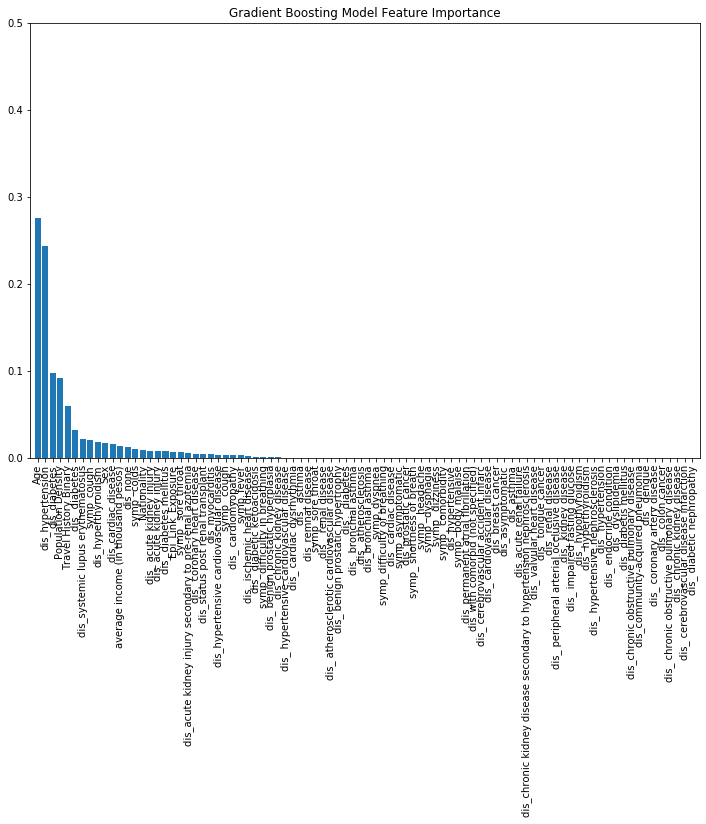

In [280]:
# Plot the feature importances of the gbm
plt.figure(figsize=(12,8))
plt.title("Gradient Boosting Model Feature Importance")
plt.bar(range(X_train.shape[1]), importance_vals[indices],
        yerr=std[indices], align="center")
#plt.xticks(range(X.shape[1]), indices)
plt.xticks(range(X_train.shape[1]), (ranked_index), rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, 0.5])
plt.show()

In [316]:
# retrain XGBoost on important features
xgb_feat_imp_train = X_train.iloc[:,[1, 72, 71, 87, 85, 40, 82, 14]]
xgb_feat_imp_train.head()

xgb_feat_imp_val = X_val.iloc[:,[1, 72, 71, 87, 85, 40, 82, 14]]
xgb_feat_imp_val.head()

xgb_feat_imp_test = X_test.iloc[:,[1, 72, 71, 87, 85, 40, 82, 14]]
xgb_feat_imp_test.head()


,Age,dis_hypertension,dis_diabetes,Population Density,Travel History Binary,dis_ diabetes,dis_systemic lupus erythematosus,symp_cough
0,0.853659,0.0,0.0,0.289282,0.5,0.0,0.0,0.0
1,0.487805,0.0,0.0,0.289282,0.5,0.0,0.0,0.0
2,0.256098,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
3,0.512195,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
4,0.292683,0.0,0.0,0.237385,0.5,0.0,0.0,0.0


In [289]:
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(xgb_feat_imp_train, y_train)
y_preds = gbm.predict(xgb_feat_imp_val)
cm_gbm_small = confusion_matrix(y_val, y_preds)
print(cm_gbm_small)
gbm.score(xgb_feat_imp_val,  y_val)

[[27  1]
 [ 9 15]]


0.8076923076923077

In [286]:
y_preds

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0])

The number of weak learners (i.e. regression trees) is controlled by the parameter n_estimators; The size of each tree can be controlled either by setting the tree depth via max_depth or by setting the number of leaf nodes via max_leaf_nodes. The learning_rate is a hyper-parameter in the range (0.0, 1.0] that controls overfitting via shrinkage .

In [290]:
# pick only 8 features since accuracy only decreases by 4% 

# HYPER PARAM TUNING 
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gbm.get_params())

Parameters currently in use:

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [293]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [50, 100, 150, 250],
    'learning_rate': [0.1, 0.4, 0.5, 1],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'min_samples_split': [2, 30, 40],
    'max_depth': [1, 3, 5, 8, 12],
    'random_state': [42]
}
param_grid

{'n_estimators': [50, 100, 150, 250],
 'learning_rate': [0.1, 0.4, 0.5, 1],
 'min_samples_leaf': [1, 10, 20, 50, 100],
 'min_samples_split': [2, 30, 40],
 'max_depth': [1, 3, 5, 8, 12],
 'random_state': [42]}

In [295]:
# Create a new  model

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gbm, param_grid = param_grid, 
                           n_jobs = -1, verbose = 2)

In [296]:
grid_search.fit(xgb_feat_imp_train, y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 1940 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 2830 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   51.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_it...
                                                  subsample=1.0, tol

In [297]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 30,
 'n_estimators': 50,
 'random_state': 42}

In [299]:

gbm_pred_gs = grid_search.predict(xgb_feat_imp_val)

y_pred_gs =  grid_search.predict(xgb_feat_imp_val)
print ("GBM Train Accuracy Baseline After Grid Search:", metrics.accuracy_score(y_train, grid_search.predict(xgb_feat_imp_train)))
print ("GBM Val Accuracy Baseline After Grid Search:", metrics.accuracy_score(y_val, grid_search.predict(xgb_feat_imp_val)))


GBM Train Accuracy Baseline After Grid Search: 0.9235668789808917
GBM Val Accuracy Baseline After Grid Search: 0.8269230769230769


In [300]:
n_estim_param_grid = {
    'n_estimators': [10, 20, 100, 200, 300, 400],
    'learning_rate': [0.1],
    'min_samples_leaf': [1],
    'min_samples_split': [30],
    'max_depth': [1, 3, 5, 8, 12],
    'random_state': [42]
}
n_estim_param_grid

{'n_estimators': [10, 20, 100, 200, 300, 400],
 'learning_rate': [0.1],
 'min_samples_leaf': [1],
 'min_samples_split': [30],
 'max_depth': [1, 3, 5, 8, 12],
 'random_state': [42]}

In [301]:
nn_grid_search = GridSearchCV(estimator = gbm, param_grid = n_estim_param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [302]:
nn_grid_search.fit(xgb_feat_imp_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  random_state=42,
 

In [304]:
print ("GBM Val Accuracy Baseline After Grid Search and N-estimators Search and 3-fold CV:", metrics.accuracy_score(y_val, nn_grid_search.predict(xgb_feat_imp_val)))


GBM Val Accuracy Baseline After Grid Search and N-estimators Search and 3-fold CV: 0.8269230769230769


In [311]:
nn_grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 30,
 'n_estimators': 300,
 'random_state': 42}

Text(0, 0.5, 'Accuracy Rate')

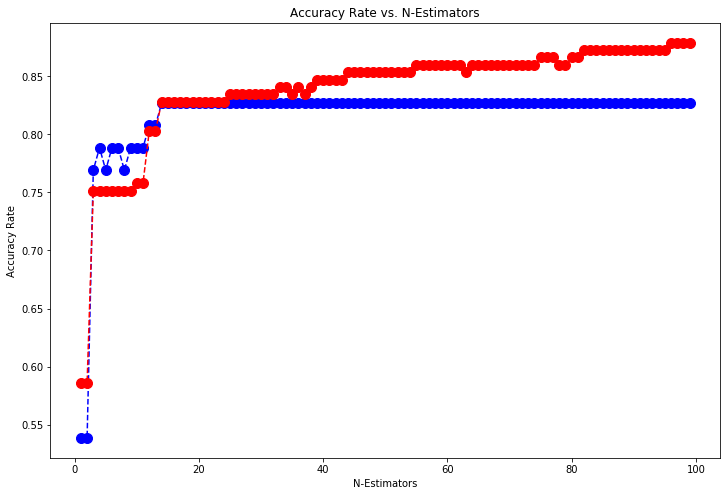

In [313]:

accuracy_rate = []
training_acc = []

for i in range(1,100):   
    rfc_plot = GradientBoostingClassifier(
                       max_depth=1, 
                       min_samples_leaf=1, min_samples_split=30, learning_rate = 0.1, random_state = 42,
                       n_estimators=i)
    rfc_plot.fit(xgb_feat_imp_train, y_train) 
    accuracy_rate.append(rfc_plot.score(xgb_feat_imp_val, y_val))
    training_acc.append(rfc_plot.score(xgb_feat_imp_train, y_train))
    
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,100), accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(np.arange(1,100), training_acc,color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

#training > testing
plt.title('Accuracy Rate vs. N-Estimators')
plt.xlabel('N-Estimators')
plt.ylabel('Accuracy Rate')

In [318]:
# model evaluation

nnest_gbm_pred_gs = nn_grid_search.predict(xgb_feat_imp_test)

nnest_y_pred_gs =  nn_grid_search.predict(xgb_feat_imp_val)
print ("GBM Train Accuracy Baseline After Grid Search Final N-estimators Search:", metrics.accuracy_score(y_train, nn_grid_search.predict(xgb_feat_imp_train)))
print ("GBM Test Accuracy Baseline After Grid Search Final N-estimators Search:", metrics.accuracy_score(y_test, nn_grid_search.predict(xgb_feat_imp_test)))
#print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

GBM Train Accuracy Baseline After Grid Search Final N-estimators Search: 0.8980891719745223
GBM Test Accuracy Baseline After Grid Search Final N-estimators Search: 0.7169811320754716


In [320]:
print(confusion_matrix(y_test,nnest_y_pred_gs))

ValueError: Found input variables with inconsistent numbers of samples: [53, 52]